# Matrix Multiplication from foundations

The foundations we will assume throughout this course are
- Python
- Matplotlib
- Python stdlib
- Jupyter notebooks and nbdev

In [ ]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt

The dataset we will use for learning fastai part 2 is Kushiji MNIST (KMNIST)

## What is KMNIST?

The characters in the KMNIST dataset represent handwritten Kuzushiji characters from the historical Japanese script. Kuzushiji is a script that was widely used in Japan until the early 20th century. The goal of the KMNIST dataset is to provide a modern machine learning benchmark for recognizing and preserving these handwritten characters.

The KMNIST dataset consists of 10 classes, each representing a specific character from the Kuzushiji script. Here are the corresponding characters for each class:

    1. お (o)
    
    2. き (ki)
    
    3. す (su)
    
    4. つ (tsu)
    
    5. な (na)
    
    6. は (ha)
    
    7. ま (ma)
    
    8. や (ya)
    
    9. れ (re)
    
    10. を (wo)
    
Each class represents a distinct character with its own unique shape and stroke patterns. By working with the KMNIST dataset, researchers and machine learning practitioners can develop models that recognize and classify these handwritten Kuzushiji characters, contributing to the understanding and preservation of this historical script.

## Get the Data (KMNIST Dataset)
> The repository for dataset is [here](https://github.com/rois-codh/kmnist). We will download the `numpy` format mentioned in the `README` of the repository.

In [ ]:
KMNIST_URL = 'http://codh.rois.ac.jp/kmnist/dataset/kmnist/'

In [ ]:
path_data = Path('data')
path_data.mkdir(exist_ok=True)

In [ ]:
train_images_file = 'kmnist-train-imgs.npz'
train_labels_file = 'kmnist-train-labels.npz'
test_images_file = 'kmnist-test-imgs.npz'
test_labels_file = 'kmnist-test-labels.npz'

We will use the library [urlretrieve](https://docs.python.org/3/library/urllib.request.html#urllib.request.urlretrieve) to retreive the data to the local 

In [ ]:
from urllib.request import urlretrieve

# Download the training image
urlretrieve(KMNIST_URL + train_images_file, path_data/train_images_file)
print('Training image file downloaded.')

# Download the training label file
urlretrieve(KMNIST_URL + train_labels_file, path_data/train_labels_file)
print('Training label file downloaded.')

# Download the test image file
urlretrieve(KMNIST_URL + test_images_file, path_data/test_images_file)
print('Test image file downloaded.')

# Download the test label file
urlretrieve(KMNIST_URL + test_labels_file, path_data/test_labels_file)
print('Test label file downloaded.')

Training image file downloaded.
Training label file downloaded.
Test image file downloaded.
Test label file downloaded.


In [ ]:
!ls -l data

total 21004
-rw-rw-r-- 1 ubuntu ubuntu  3079479 Jun 11 17:28 kmnist-test-imgs.npz
-rw-rw-r-- 1 ubuntu ubuntu     5304 Jun 11 17:28 kmnist-test-labels.npz
-rw-rw-r-- 1 ubuntu ubuntu 18384171 Jun 11 17:28 kmnist-train-imgs.npz
-rw-rw-r-- 1 ubuntu ubuntu    29700 Jun 11 17:28 kmnist-train-labels.npz


In [ ]:
import numpy as np # using numpy for loading the data

# File paths for the MNIST dataset
x_train = np.load(path_data/train_images_file)['arr_0'].reshape(-1, 784)/255.0
x_train = np.float32(x_train)
y_train = np.load(path_data/train_labels_file)['arr_0']
x_valid = np.load(path_data/test_images_file)['arr_0'].reshape(-1, 784)/255.0
x_valid = np.float32(x_valid)
y_valid = np.load(path_data/test_labels_file)['arr_0']

In [ ]:
lst1 = list(x_train[0])
vals = lst1[200:210]
vals

[0.0, 0.0, 0.0, 0.8039216, 1.0, 0.69803923, 0.011764706, 0.0, 0.0, 0.003921569]

In [ ]:
len(lst1)

784

In [ ]:
def chunks(x, sz):
    for i in range(0, len(x), sz): yield x[i: i+sz]

In [ ]:
list(chunks(vals, 5))

[[0.0, 0.0, 0.0, 0.8039216, 1.0],
 [0.69803923, 0.011764706, 0.0, 0.0, 0.003921569]]

In [ ]:
val_iter = chunks(vals, 5)

In [ ]:
next(val_iter)

[0.0, 0.0, 0.0, 0.8039216, 1.0]

In [ ]:
next(val_iter)

[0.69803923, 0.011764706, 0.0, 0.0, 0.003921569]

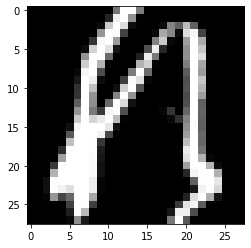

In [ ]:
mpl.rcParams['image.cmap'] = 'gray'
plt.imshow(list(chunks(lst1, 28)));

Seeing the image I think it is `re`, lets confirm 

In [ ]:
y_train[0]

8

It is `re`! (The `8` represents the class `re`)

[islice](https://docs.python.org/3/library/itertools.html#itertools.islice)

In [ ]:
from itertools import islice

In [ ]:
it = iter(vals)

In [ ]:
list(islice(it, 5))

[0.0, 0.0, 0.0, 0.8039216, 1.0]

In [ ]:
list(islice(it, 5))

[0.69803923, 0.011764706, 0.0, 0.0, 0.003921569]

Lets use `next`

In [ ]:
it = iter(vals)
isit = islice(it, 5)

In [ ]:
next(isit)

0.0

In [ ]:
next(isit)

0.0

In [ ]:
next(isit)

0.0

In [ ]:
next(isit)

0.8039216

In [ ]:
next(isit)

1.0

Using the above code for `islice` and `iter`

In [ ]:
it = iter(lst1)
img = list(iter(lambda: list(islice(it, 28)), []))

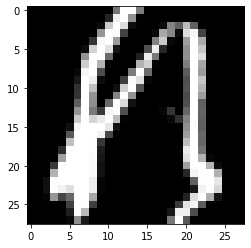

In [ ]:
plt.imshow(img);

## Matrix and tensor

In [ ]:
img[20][15]

0.0

In [ ]:
class Matrix:
    def __init__(self, xs): self.xs = xs
    def __getitem__(self, idxs): return self.xs[idxs[0]][idxs[1]]

In [ ]:
m = Matrix(img)
m[20, 15]

0.0

In [ ]:
import torch
from torch import tensor

In [ ]:
tensor([1, 2, 3])

tensor([1, 2, 3])

In [ ]:
img_tensor = tensor(img); img_tensor[20, 15]

tensor(0.)

In [ ]:
x_train, y_train, x_valid, y_valid = map(tensor, (x_train, y_train, x_valid, y_valid))

In [ ]:
x_train.shape

torch.Size([60000, 784])

In [ ]:
x_train.type()

'torch.FloatTensor'

[Tensor](https://pytorch.org/docs/stable/tensors.html)

In [ ]:
imgs = x_train.reshape((-1, 28, 28))
imgs.shape

torch.Size([60000, 28, 28])

<matplotlib.image.AxesImage>

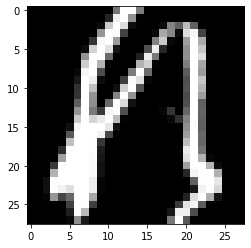

In [ ]:
plt.imshow(imgs[0])

In [ ]:
imgs[0].shape

torch.Size([28, 28])

In [ ]:
imgs[0, 20, 15]

tensor(0.)

In [ ]:
n, c = x_train.shape
y_train, y_train.shape

(tensor([8, 7, 0,  ..., 0, 4, 9], dtype=torch.uint8), torch.Size([60000]))

In [ ]:
min(y_train), max(y_train)

(tensor(0, dtype=torch.uint8), tensor(9, dtype=torch.uint8))

In [ ]:
y_train.min(), y_train.max()

(tensor(0, dtype=torch.uint8), tensor(9, dtype=torch.uint8))

## Random Numbers

Based on the Wichmann Hill algo used before Python 2.3

In [ ]:
rnd_state = None
def seed(a):
    global rnd_state
    a, x = divmod(a, 30268)
    a, y = divmod(a, 30306)
    a, z = divmod(a, 30322)
    rnd_state = int(x) + 1, int(y) + 1, int(z) + 1

In [ ]:
seed(78)
rnd_state

(79, 1, 1)

In [ ]:
def rand():
    global rnd_state
    x, y, z = rnd_state
    x = (171 * x) % 30269
    y = (172 * y) % 30307
    z = (170 * x) % 30323
    rnd_state = x, y, z
    return (x/30269 + y/30307 + z/30323) % 1.0

In [ ]:
rand(), rand(), rand()

(0.18755370202551447, 0.08563584800214263, 0.967860810266028)

In [ ]:
if os.fork(): print(f'In parent: {rand()}')
else:
    print(f'In child: {rand()}')
    os._exit(os.EX_OK)

In parent: 0.9969053665691592
In child: 0.9969053665691592


In [ ]:
if os.fork(): print(f'In parent: {torch.rand(1)}')
else:
    print(f'In child: {torch.rand(1)}')
    os._exit(os.EX_OK)

In parent: tensor([0.8378])
In child: tensor([0.8378])


In [ ]:
if os.fork(): print(f'In parent: {np.random.rand(1)}')
else:
    print(f'In child: {np.random.rand(1)}')
    os._exit(os.EX_OK)

In parent: [0.37408799]
In child: [0.37408799]


In [ ]:
import random

In [ ]:
if os.fork(): print(f'In parent: {random.random()}')
else:
    print(f'In child: {random.random()}')
    os._exit(os.EX_OK)

In parent: 0.8256941082748851
In child: 0.024069914563894512


[<matplotlib.lines.Line2D>]

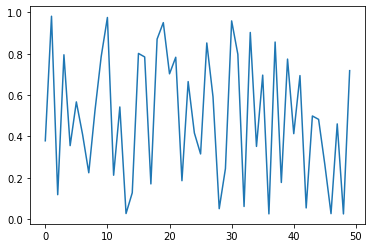

In [ ]:
plt.plot([rand() for _ in range(50)])

(array([1028.,  977.,  949., 1005., 1007., 1011.,  999., 1011.,  988.,
        1025.]),
 array([4.00498918e-05, 1.00035217e-01, 2.00030384e-01, 3.00025551e-01,
        4.00020718e-01, 5.00015885e-01, 6.00011052e-01, 7.00006219e-01,
        8.00001386e-01, 8.99996553e-01, 9.99991720e-01]),
 <BarContainer object of 10 artists>)

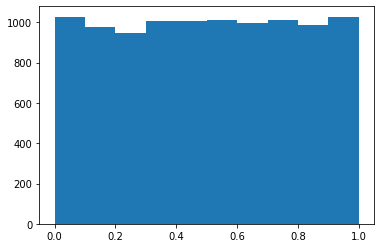

In [ ]:
plt.hist([rand() for _ in range(10_000)])

In [ ]:
%timeit -n 10 list(chunks([rand() for _ in range(7840)], 10))

2.69 ms ± 31.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit -n 10 torch.randn(784, 10)

40.7 µs ± 10.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Matrix Multiplication

In [ ]:
torch.manual_seed(1)
weights = torch.randn(784, 10)
bias = torch.zeros(10)

In [ ]:
m1 = x_valid[:5]
m2 = weights

In [ ]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [ ]:
ar, ac = m1.shape
br, bc = m2.shape
(ar, ac), (br, bc)

((5, 784), (784, 10))

In [ ]:
t1 = torch.zeros(ar, bc)
t1.shape

torch.Size([5, 10])

In [ ]:
for i in range(ar): # 5
    for j in range(bc): # 10
        for k in range(ac): # 784
            t1[i, j] += m1[i, k] * m2[k, j]

In [ ]:
t1

tensor([[-3.0117e+00, -8.5644e+00, -9.2000e+00,  2.1133e+00,  3.1043e+01,
          8.2828e+00, -2.3903e+01, -2.7770e+01,  6.2782e+00,  1.3998e+01],
        [ 1.8971e+00, -1.6805e+01, -9.0493e+00, -3.1443e+00, -1.4109e+01,
         -4.6473e+00, -3.5029e+01, -5.0467e+00, -1.0138e+01, -1.3681e+01],
        [ 7.3971e+00, -9.9802e+00, -8.8278e+00,  3.3733e+00,  6.5050e+00,
          2.2608e-02,  9.8208e-01, -1.0190e+01, -1.3008e+01,  4.4429e+00],
        [ 1.0392e+01, -1.2656e+01, -1.7699e+01,  9.2111e+00,  2.2837e+01,
          2.6548e+01, -1.6465e-01, -1.6619e+01, -1.0451e+01,  1.2815e+01],
        [-1.2335e+01, -1.2113e+01, -5.0027e+00,  5.7400e+00, -7.7002e+00,
          7.4970e+00, -2.3195e+00,  4.7629e-02, -3.2490e+01,  4.5530e+00]])

In [ ]:
t1.shape

torch.Size([5, 10])

In [ ]:
torch.set_printoptions(precision=2, linewidth=200, sci_mode=False)
t1

tensor([[    -3.01,     -8.56,     -9.20,      2.11,     31.04,      8.28,    -23.90,    -27.77,      6.28,     14.00],
        [     1.90,    -16.80,     -9.05,     -3.14,    -14.11,     -4.65,    -35.03,     -5.05,    -10.14,    -13.68],
        [     7.40,     -9.98,     -8.83,      3.37,      6.50,      0.02,      0.98,    -10.19,    -13.01,      4.44],
        [    10.39,    -12.66,    -17.70,      9.21,     22.84,     26.55,     -0.16,    -16.62,    -10.45,     12.81],
        [   -12.34,    -12.11,     -5.00,      5.74,     -7.70,      7.50,     -2.32,      0.05,    -32.49,      4.55]])

In [ ]:
import numpy as np
np.set_printoptions(precision=2, linewidth=140)

In [ ]:
def matmul(a, b):
    (ar, ac), (br, bc) = a.shape, b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                c[i, j] += a[i, k] * b[k, j]
    return c

In [ ]:
%time _=matmul(m1, m2)

CPU times: user 430 ms, sys: 0 ns, total: 430 ms
Wall time: 430 ms


In [ ]:
%time _=matmul(x_valid, weights)

CPU times: user 14min 17s, sys: 170 ms, total: 14min 17s
Wall time: 14min 17s


In [ ]:
ar * bc * ac

39200

## Numba

In [ ]:
from numba import njit

In [ ]:
@njit
def dot(a, b):
    res = 0
    for i in range(len(a)): res += a[i]*b[i]
    return res

In [ ]:
from numpy import array

In [ ]:
%time dot(array([1., 2, 6]), array([2., 3, 4]))

CPU times: user 968 ms, sys: 2.28 s, total: 3.25 s
Wall time: 241 ms


32.0

In [ ]:
%time dot(array([1., 2, 6]), array([2., 3, 4]))

CPU times: user 6 µs, sys: 11 µs, total: 17 µs
Wall time: 19.8 µs


32.0

Now only two of our loops are running in Python, not three

In [ ]:
def matmul(a, b):
    (ar, ac), (br, bc) = a.shape, b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i, j] = dot(a[i, :], b[:, j])
    return c

In [ ]:
m1a, m2a = m1.numpy(), m2.numpy()

In [ ]:
from fastcore.test import *

In [ ]:
test_close(t1, matmul(m1a, m2a), eps=1e-04)

In [ ]:
%timeit -n 50 matmul(m1a, m2a)

278 µs ± 12 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


## Elementwise ops

In [ ]:
a = tensor([10., 6, -4])
b = tensor([2., 8, 7])
a, b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

In [ ]:
a + b

tensor([12., 14.,  3.])

In [ ]:
(a < b).float().mean()

tensor(0.67)

In [ ]:
m  = tensor([[1., 2, 3], [4, 5, 6], [7, 8, 9]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

Frobenius norm:

$$\| A \|_F = \left( \sum_{i,j=1}^n | a_{ij} |^2 \right)^{1/2}$$

In [ ]:
sf = (m*m).sum()
sf

tensor(285.)

In [ ]:
sf.sqrt()

tensor(16.88)

In [ ]:
m[2, :], m[:, 2]

(tensor([7., 8., 9.]), tensor([3., 6., 9.]))

In [ ]:
m[2]

tensor([7., 8., 9.])

In [ ]:
def matmul(a, b):
    (ar, ac), (br, bc) = a.shape, b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i, j] = (a[i, :] * b[:, j]).sum()
    return c

In [ ]:
test_close(t1, matmul(m1, m2), eps=1e-4)

In [ ]:
%timeit -n 50 _=matmul(m1, m2)

680 µs ± 5.06 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [ ]:
def matmul(a, b):
    (ar, ac), (br, bc) = a.shape, b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc): 
            c[i, j] = torch.dot(a[i,:], b[:, j])
    return c

In [ ]:
test_close(t1, matmul(m1, m2), eps=1e-4)

In [ ]:
%timeit -n 50 _=matmul(m1, m2)

574 µs ± 4.47 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


## Broadcasting

In [ ]:
a

tensor([10.,  6., -4.])

In [ ]:
a > 0

tensor([ True,  True, False])

In [ ]:
a + 1

tensor([11.,  7., -3.])

In [ ]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [ ]:
2 * m

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.],
        [14., 16., 18.]])

## Broadcasting a vector to matrix

In [ ]:
c = tensor([10., 20, 30]); c

tensor([10., 20., 30.])

In [ ]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [ ]:
m.shape, c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [ ]:
m + c

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [ ]:
c + m

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [ ]:
t = c.expand_as(m); t

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [ ]:
m + t

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [ ]:
t.storage()

 10.0
 20.0
 30.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 3]

In [ ]:
t.stride(), t.shape

((0, 1), torch.Size([3, 3]))

In [ ]:
c.unsqueeze(0), c[None, :]

(tensor([[10., 20., 30.]]), tensor([[10., 20., 30.]]))

In [ ]:
c.shape, c.unsqueeze(0).shape

(torch.Size([3]), torch.Size([1, 3]))

In [ ]:
c.unsqueeze(1), c[:, None]

(tensor([[10.],
         [20.],
         [30.]]),
 tensor([[10.],
         [20.],
         [30.]]))

In [ ]:
c.shape, c.unsqueeze(1).shape

(torch.Size([3]), torch.Size([3, 1]))

In [ ]:
c[None].shape, c[..., None].shape

(torch.Size([1, 3]), torch.Size([3, 1]))

In [ ]:
c[:, None].expand_as(m)

tensor([[10., 10., 10.],
        [20., 20., 20.],
        [30., 30., 30.]])

In [ ]:
m + c[:, None]

tensor([[11., 12., 13.],
        [24., 25., 26.],
        [37., 38., 39.]])

In [ ]:
m + c[None, :]

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

## Broadcasting Rules

In [ ]:
c[None, :]

tensor([[10., 20., 30.]])

In [ ]:
c[None, :].shape

torch.Size([1, 3])

In [ ]:
c[:, None]

tensor([[10.],
        [20.],
        [30.]])

In [ ]:
c[:, None].shape

torch.Size([3, 1])

In [ ]:
c[None, :] * c[:, None]

tensor([[100., 200., 300.],
        [200., 400., 600.],
        [300., 600., 900.]])

In [ ]:
c[None] > c[:, None]

tensor([[False,  True,  True],
        [False, False,  True],
        [False, False, False]])

## Matmul with broadcasting

In [ ]:
digit = m1[0]
digit.shape, m2.shape

(torch.Size([784]), torch.Size([784, 10]))

In [ ]:
digit[:, None].shape

torch.Size([784, 1])

In [ ]:
digit[:, None].expand_as(m2).shape

torch.Size([784, 10])

In [ ]:
(digit[:, None] * m2).shape

torch.Size([784, 10])

In [ ]:
def matmul(a, b):
    (ar, ac), (br, bc) = a.shape, b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        c[i] = (a[i, :, None] * b).sum(dim=0)
    return c

In [ ]:
test_close(t1, matmul(m1, m2), eps=1e-4)

In [ ]:
%timeit -n 50 _=matmul(m1, m2)

82.6 µs ± 3.01 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


### Lets do it on whole dataset

In [ ]:
tr = matmul(x_train, weights)
tr

tensor([[  4.11, -12.53,  -1.89,  ..., -21.99,   3.60,   6.80],
        [  1.38,  15.69, -17.93,  ..., -26.70,  -7.98,   9.86],
        [-10.35,  -6.54,  -6.13,  ...,  -5.52,  21.08,   6.99],
        ...,
        [-13.34, -18.76,   2.85,  ..., -10.86,   2.95,   7.05],
        [ -6.85, -18.32, -17.35,  ...,  -2.53, -27.76,  20.31],
        [  0.58, -14.51,   6.24,  ...,  -4.71, -12.11,   8.88]])

In [ ]:
tr.shape

torch.Size([60000, 10])

In [ ]:
%time _=matmul(x_train, weights)

CPU times: user 977 ms, sys: 0 ns, total: 977 ms
Wall time: 912 ms


## Einstein summation

Einstein summation is a compact representation for combining products and sums in a general way. The key rules are:
   - Repeating letters between input arrays means that values along those axes will be multiplied together
   - Omitting a letter from the output means that values along that axis will be summed

In [ ]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [ ]:
mr = torch.einsum('ik,kj->ikj', m1, m2)
mr.shape

torch.Size([5, 784, 10])

In [ ]:
mr.sum(1)

tensor([[    -3.01,     -8.56,     -9.20,      2.11,     31.04,      8.28,    -23.90,    -27.77,      6.28,     14.00],
        [     1.90,    -16.80,     -9.05,     -3.14,    -14.11,     -4.65,    -35.03,     -5.05,    -10.14,    -13.68],
        [     7.40,     -9.98,     -8.83,      3.37,      6.50,      0.02,      0.98,    -10.19,    -13.01,      4.44],
        [    10.39,    -12.66,    -17.70,      9.21,     22.84,     26.55,     -0.16,    -16.62,    -10.45,     12.81],
        [   -12.34,    -12.11,     -5.00,      5.74,     -7.70,      7.50,     -2.32,      0.05,    -32.49,      4.55]])

In [ ]:
torch.einsum('ik,kj->ij', m1, m2)

tensor([[    -3.01,     -8.56,     -9.20,      2.11,     31.04,      8.28,    -23.90,    -27.77,      6.28,     14.00],
        [     1.90,    -16.80,     -9.05,     -3.14,    -14.11,     -4.65,    -35.03,     -5.05,    -10.14,    -13.68],
        [     7.40,     -9.98,     -8.83,      3.37,      6.50,      0.02,      0.98,    -10.19,    -13.01,      4.44],
        [    10.39,    -12.66,    -17.70,      9.21,     22.84,     26.55,     -0.16,    -16.62,    -10.45,     12.81],
        [   -12.34,    -12.11,     -5.00,      5.74,     -7.70,      7.50,     -2.32,      0.05,    -32.49,      4.55]])

In [ ]:
def matmul(a, b): return torch.einsum('ik,kj->ij', a, b)

In [ ]:
test_close(tr, matmul(x_train, weights), eps=1e-3)

In [ ]:
%timeit -n 5 _=matmul(x_train, weights)

4.92 ms ± 189 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


### pytorch op

We can use pytorch's function or operator directly for matrix multiplication.

In [ ]:
test_close(tr, x_train@weights, eps=1e-3)

In [ ]:
%timeit -n 5 _=torch.matmul(x_train, weights)

4.92 ms ± 182 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


## CUDA

In [ ]:
def matmul(grid, a, b, c):
    i, j = grid
    if i < c.shape[0] and j < c.shape[1]:
        tmp = 0.
        for k in range(a.shape[1]): tmp += a[i, k] * b[k, j]
        c[i, j] = tmp

In [ ]:
res = torch.zeros(ar, bc)
matmul((0, 0), m1, m2, res)
res

tensor([[-3.01,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00],
        [ 0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00],
        [ 0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00],
        [ 0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00],
        [ 0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00]])

In [ ]:
def launch_kernel(kernel, grid_x, grid_y, *args, **kwargs):
    for i in range(grid_x):
        for j in range(grid_y):
            kernel((i, j), *args, **kwargs)

In [ ]:
res = torch.zeros(ar, bc)
launch_kernel(matmul, ar, bc, m1, m2, res)
res

tensor([[    -3.01,     -8.56,     -9.20,      2.11,     31.04,      8.28,    -23.90,    -27.77,      6.28,     14.00],
        [     1.90,    -16.80,     -9.05,     -3.14,    -14.11,     -4.65,    -35.03,     -5.05,    -10.14,    -13.68],
        [     7.40,     -9.98,     -8.83,      3.37,      6.50,      0.02,      0.98,    -10.19,    -13.01,      4.44],
        [    10.39,    -12.66,    -17.70,      9.21,     22.84,     26.55,     -0.16,    -16.62,    -10.45,     12.81],
        [   -12.34,    -12.11,     -5.00,      5.74,     -7.70,      7.50,     -2.32,      0.05,    -32.49,      4.55]])

In [ ]:
from numba import cuda

In [ ]:
@cuda.jit
def matmul(a, b, c):
    i, j = cuda.grid(2)
    if i < c.shape[0] and j < c.shape[1]:
        tmp = 0.
        for k in range(a.shape[1]): tmp += a[i, k] * b[k, j]
        c[i, j] = tmp

In [ ]:
r = np.zeros(tr.shape)
m1g, m2g, rg = cuda.to_device(x_train), cuda.to_device(weights), cuda.to_device(r)

In [ ]:
r.shape

(60000, 10)

In [ ]:
TPB = 16
rr, rc = r.shape
blockspergrid = (math.ceil(rr / TPB), math.ceil(rc / TPB))
blockspergrid

(3750, 1)

In [ ]:
matmul[blockspergrid, (TPB, TPB)](m1g, m2g, rg)
r = rg.copy_to_host()
test_close(tr, r, eps=1.03)

In [ ]:
%%timeit -n 10
matmul[blockspergrid, (TPB, TPB)](m1g, m2g, rg)
r = rg.copy_to_host()

5.18 ms ± 57.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
m1c, m2c = x_train.cuda(), weights.cuda()

In [ ]:
r = (m1c @ m2c).cpu()

In [ ]:
%timeit -n 10 r=(m1c@m2c).cpu()

698 µs ± 139 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Our broadcastng version was > 500ms, and our CUDA version is around 0.5 ms, which is another 1000x improvement compared to broacasting. So our total speedup is around 5 million times compared to the initial 3 loop matrix multiplication!